In [1]:
import pandas as pd
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [2]:
x_df = pd.read_csv('../datasets/winequality_red_x_train.csv')
y_df = pd.read_csv('../datasets/winequality_red_y_train.csv')

In [3]:
def reverse_ohe(row):
    if row['3'] == 1:
        return 3
    elif row['4'] == 1:
        return 4
    elif row['5'] == 1:
        return 5
    elif row['6'] == 1:
        return 6
    elif row['7'] == 1:
        return 7
    elif row['8'] == 1:
        return 8

y_df['label'] = y_df.apply(reverse_ohe, axis=1)

In [4]:
redwine_df = x_df.copy()
redwine_df['wine_quality'] = y_df['label']

redwine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality
0,0.690265,0.157534,0.49,0.116438,0.111853,0.366197,0.222615,0.685022,0.299213,0.251497,0.307692,6
1,0.185841,0.431507,0.01,0.102740,0.110184,0.225352,0.091873,0.398678,0.637795,0.167665,0.676923,6
2,0.176991,0.349315,0.00,0.232877,0.135225,0.704225,0.252650,0.404552,0.362205,0.071856,0.169231,5
3,0.566372,0.123288,0.58,0.082192,0.070117,0.084507,0.045936,0.582232,0.448819,0.329341,0.323077,7
4,0.336283,0.428082,0.11,0.068493,0.130217,0.211268,0.201413,0.472100,0.354331,0.293413,0.184615,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1066,0.398230,0.328767,0.00,0.068493,0.076795,0.056338,0.014134,0.560206,0.346457,0.179641,0.307692,6
1067,0.318584,0.352740,0.10,0.082192,0.101836,0.338028,0.190813,0.463289,0.433071,0.251497,0.384615,6
1068,0.230088,0.342466,0.06,0.123288,0.108514,0.197183,0.279152,0.542584,0.606299,0.125749,0.169231,5
1069,0.292035,0.054795,0.35,0.054795,0.070117,0.084507,0.031802,0.331131,0.456693,0.281437,0.538462,7


<AxesSubplot: >

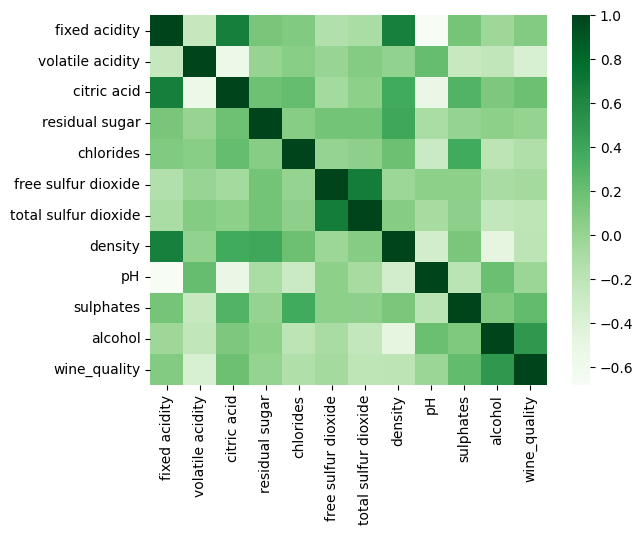

In [5]:
sns.heatmap(redwine_df.corr(), cmap="Greens")

In [6]:
drop_features = ["citric acid", "density", "free sulfur dioxide"]

redwine_df.drop(drop_features, inplace=True, axis=1)

redwine_df

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol,wine_quality
0,0.690265,0.157534,0.116438,0.111853,0.222615,0.299213,0.251497,0.307692,6
1,0.185841,0.431507,0.102740,0.110184,0.091873,0.637795,0.167665,0.676923,6
2,0.176991,0.349315,0.232877,0.135225,0.252650,0.362205,0.071856,0.169231,5
3,0.566372,0.123288,0.082192,0.070117,0.045936,0.448819,0.329341,0.323077,7
4,0.336283,0.428082,0.068493,0.130217,0.201413,0.354331,0.293413,0.184615,5
...,...,...,...,...,...,...,...,...,...
1066,0.398230,0.328767,0.068493,0.076795,0.014134,0.346457,0.179641,0.307692,6
1067,0.318584,0.352740,0.082192,0.101836,0.190813,0.433071,0.251497,0.384615,6
1068,0.230088,0.342466,0.123288,0.108514,0.279152,0.606299,0.125749,0.169231,5
1069,0.292035,0.054795,0.054795,0.070117,0.031802,0.456693,0.281437,0.538462,7


In [7]:
x_relevant = redwine_df.iloc[:,:-1]
x_relevant

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol
0,0.690265,0.157534,0.116438,0.111853,0.222615,0.299213,0.251497,0.307692
1,0.185841,0.431507,0.102740,0.110184,0.091873,0.637795,0.167665,0.676923
2,0.176991,0.349315,0.232877,0.135225,0.252650,0.362205,0.071856,0.169231
3,0.566372,0.123288,0.082192,0.070117,0.045936,0.448819,0.329341,0.323077
4,0.336283,0.428082,0.068493,0.130217,0.201413,0.354331,0.293413,0.184615
...,...,...,...,...,...,...,...,...
1066,0.398230,0.328767,0.068493,0.076795,0.014134,0.346457,0.179641,0.307692
1067,0.318584,0.352740,0.082192,0.101836,0.190813,0.433071,0.251497,0.384615
1068,0.230088,0.342466,0.123288,0.108514,0.279152,0.606299,0.125749,0.169231
1069,0.292035,0.054795,0.054795,0.070117,0.031802,0.456693,0.281437,0.538462


In [8]:
y_original = y_df.iloc[:,:-1]
y_original

,3,4,5,6,7,8
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
1066,0,0,0,1,0,0
1067,0,0,0,1,0,0
1068,0,0,1,0,0,0
1069,0,0,0,0,1,0


In [9]:
x_train_0, x_test_0, y_train_0, y_test_0 = train_test_split(x_df, y_original, test_size=0.2, random_state=0)
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_relevant, y_original, test_size=0.2, random_state=0)

#original
model1 = MLPClassifier()

model1.fit(x_train_0, y_train_0)
pred_0 = model1.predict(x_test_0)
print("Original f1 score: {}".format(f1_score(y_test_0, pred_0, average="macro")))

#relevant
model2 = MLPClassifier()

model2.fit(x_train_1, y_train_1)
pred_1 = model2.predict(x_test_1)
print("Relevant f1 score: {}".format(f1_score(y_test_1, pred_1, average="macro")))


c:\Training\Demo\Python\pytorch training\ml mini project\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Training\Demo\Python\pytorch training\ml mini project\env\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Original f1 score: 0.2228765539721043
Relevant f1 score: 0.22903639570306236


c:\Training\Demo\Python\pytorch training\ml mini project\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Training\Demo\Python\pytorch training\ml mini project\env\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
